# Telecom Customer Churn Analysis 

A real-world project to predict churn and uncover customer behavior insights  
using a dataset from an Iranian telecom company.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn  
**Objective:** Use data exploration and machine learning to understand customer behavior and predict churn likelihood.

This dataset is derived from a telecom company operating in Iran. It contains real customer-level information including demographics, call usage, SMS frequency, and plan details.  
Each row represents one customer.


### 🔧 Project Workflow

This notebook is structured as follows:
1. **Data Preview & Understanding**
2. **Exploratory Data Analysis**
3. **Statistical Testing**
4. **Churn Prediction using Machine Learning**
5. **Model Evaluation & Insights**

The goal is to translate behavioral data into actionable churn predictions.


### 1️⃣ Load Dataset

We begin by loading the customer churn dataset into memory and performing an initial structural inspection to understand the shape and completeness of the data.


In [1]:
import pandas as pd
churn = pd.read_csv("data/customer_churn.csv")
print(churn.shape)
churn.head(100)

(3150, 14)


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,19,2,6453,144,90,44,2,2,1,25,701.865,0
96,15,0,17,1,8993,174,78,42,5,1,1,55,254.505,0
97,11,0,18,4,2913,48,36,21,3,1,1,30,262.440,0
98,5,0,11,2,4450,43,220,12,3,1,1,30,1059.720,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which age groups send more SMS messages than make phone calls?
- 📊 **Visualize**: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- 🔎 **Analyze**: Are there significant differences between the length of phone calls between different tariff plans?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

### 2️⃣ Exploratory Data Analysis (EDA)

EDA is conducted to find trends or behaviors linked to churn.

We start by analyzing whether customer preferences for SMS versus calls vary by age group — as different communication styles may correlate with churn.


In [2]:
usage_by_age=churn.groupby("Age Group")[["Frequency of SMS","Frequency of use"]].sum()
print(usage_by_age)

           Frequency of SMS  Frequency of use
Age Group                                    
1                      2484              9427
2                     78293             74742
3                    128311             97531
4                     16611             23922
5                      4802             13179


In [3]:
sms_more=usage_by_age[usage_by_age["Frequency of SMS"]>usage_by_age["Frequency of use"]]
print(sms_more)

           Frequency of SMS  Frequency of use
Age Group                                    
2                     78293             74742
3                    128311             97531


In [4]:
sms_more_age_group=sms_more.index.tolist()
print(sms_more_age_group)

[2, 3]


### 💡 Insight

We observe that Age Groups **2** and **3** tend to send more SMS than make phone calls.  
This suggests a preference for asynchronous communication in younger demographics — a behavior telecoms might leverage for targeted messaging plans.


Next, we categorize users by how long they stay on calls. We then examine how call durations and contact variety vary by age.

This helps determine if different age segments use voice services differently — useful for plan design and churn risk analysis.


In [5]:
print(churn['Seconds of Use'].describe())

def call_length_category(seconds):
    if seconds < 1391:
        return 'Short'
    elif seconds < 2990:
        return 'Medium'
    else:
        return 'Long'

churn['Call Length Category']=churn['Seconds of Use'].apply(call_length_category)
print(churn.head(6))

count     3150.000000
mean      4472.459683
std       4197.908687
min          0.000000
25%       1391.250000
50%       2990.000000
75%       6478.250000
max      17090.000000
Name: Seconds of Use, dtype: float64
   Call Failure  Complaints  ...  Churn  Call Length Category
0             8           0  ...      0                  Long
1             0           0  ...      0                 Short
2            10           0  ...      0                Medium
3            10           0  ...      0                  Long
4             3           0  ...      0                Medium
5            11           0  ...      0                  Long

[6 rows x 15 columns]


In [6]:
grouped=churn.groupby(["Age Group","Call Length Category"])["Distinct Called Numbers"].sum().reset_index()
print(grouped)

    Age Group Call Length Category  Distinct Called Numbers
0           1                 Long                     3097
1           1               Medium                     1077
2           1                Short                       48
3           2                 Long                    17692
4           2               Medium                     3641
5           2                Short                     2503
6           3                 Long                    21045
7           3               Medium                     7764
8           3                Short                     1832
9           4                 Long                     5440
10          4               Medium                     2898
11          4                Short                     1966
12          5                 Long                     3624
13          5               Medium                     1227
14          5                Short                      202


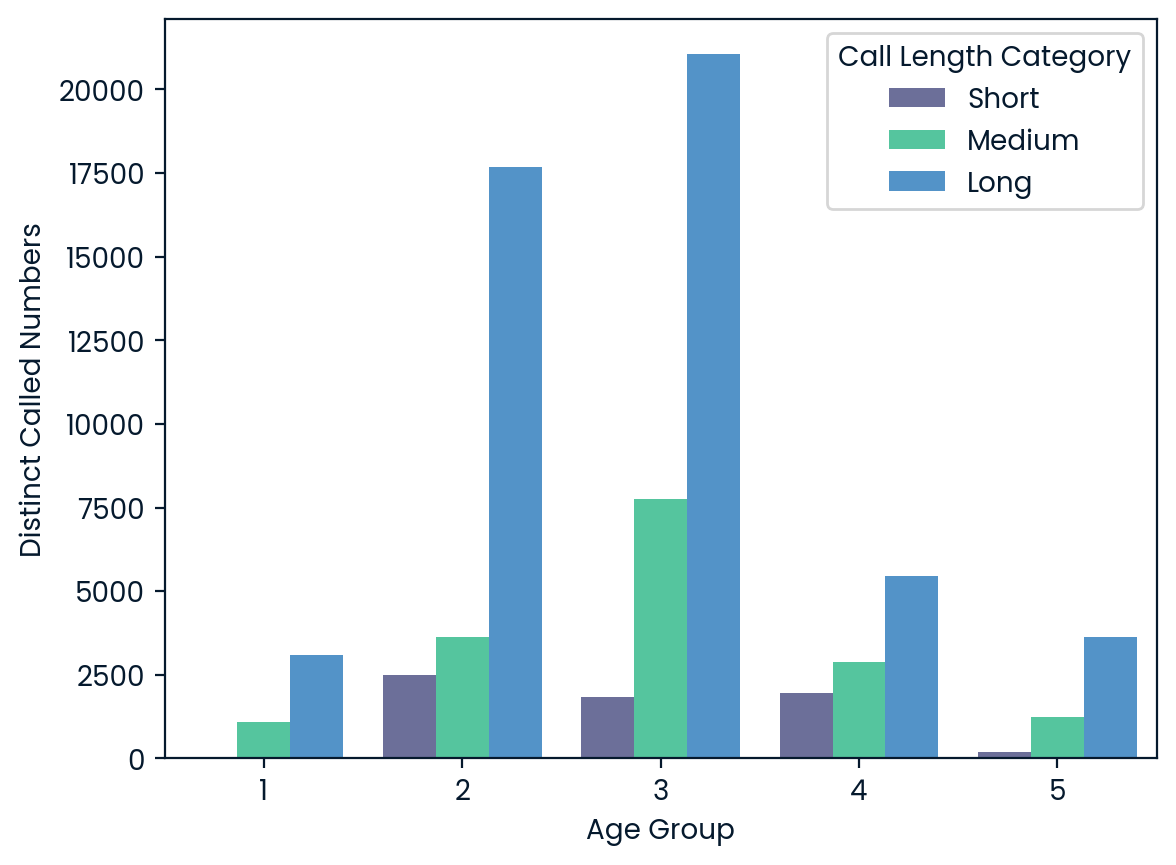

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=grouped, x='Age Group', y='Distinct Called Numbers', hue='Call Length Category',hue_order=['Short', 'Medium', 'Long'])
plt.show()

### 📊 Interpretation

Younger age groups (2 & 3) not only engage more frequently but also connect with more unique numbers during longer calls.  
This behavioral richness might suggest social dependence on telecom services, which could inform loyalty program design.


### 3️⃣ Statistical Testing: Tariff Plan Comparison

To explore if pricing plans influence usage, we use **Welch’s t-test** to compare average call durations between two tariff groups.  
This test accommodates unequal variance and sample size, making it ideal for real-world business data.


In [8]:
churn.groupby('Tariff Plan')['Seconds of Use'].describe()

,count,mean,std,min,25%,50%,75%,max
Tariff Plan,,,,,,,,
1,2905.0,4309.620998,4153.870563,0.0,1360.0,2858.0,6123.0,16785.0
2,245.0,6403.261224,4244.181070,300.0,2025.0,6560.0,7270.0,17090.0


In [9]:
from scipy.stats import ttest_ind

plan1=churn[churn['Tariff Plan']==1]['Seconds of Use']
plan2=churn[churn['Tariff Plan']==2]['Seconds of Use']

t_stat, p_value=ttest_ind(plan1, plan2, equal_var=False) 

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -7.43
P-value: 0.0000


### 🧪 Test Result

The test produces a **very small p-value**, indicating that the two groups differ significantly in terms of call duration.  
Business implication: Pricing plans directly influence user behavior. Customer segmentation based on tariff type may improve churn prediction.


## 4️⃣ Churn Prediction Using Machine Learning

We now develop models to classify customers as churners or non-churners.  
Our goal is to evaluate how well user behavior (usage, plan, demographics) predicts churn.

We use two algorithms:
- **Logistic Regression** for baseline interpretability
- **Random Forest** for robust performance


### 🔄 Data Preprocessing

We apply transformations to handle categorical features, scale numeric data, and ensure compatibility with scikit-learn pipelines.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             recall_score, precision_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ------------- Select target & features -------------
target = "Churn"
X = churn.drop(columns=[target])
y = churn[target]

# Separate numeric & categorical columns
numeric_cols = [
    "Subscription Length",
    "Charge Amount",
    "Seconds of Use",
    "Frequency of use",
    "Frequency of SMS",
    "Distinct Called Numbers",
    "Age",
    "Customer Value"
]

categorical_cols = [
    "Complaints",
    "Age Group",
    "Tariff Plan",
    "Status"
]

# Pre‑process: scale numerics, one‑hot encode categoricals
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)


In [11]:
logreg_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=200, class_weight='balanced'))
])

logreg_clf.fit(X_train, y_train)
y_pred_lr = logreg_clf.predict(X_test)

print("🔹  Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr, digits=3))


🔹  Logistic Regression Performance
              precision    recall  f1-score   support

           0      0.978     0.839     0.903       797
           1      0.510     0.899     0.650       148

    accuracy                          0.849       945
   macro avg      0.744     0.869     0.777       945
weighted avg      0.905     0.849     0.864       945



In [12]:
rf_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight='balanced',
        random_state=42))
])

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("🔹  Random Forest Performance")
print(classification_report(y_test, y_pred_rf, digits=3))

#  Optionally compute and print core metrics
recall_rf     = recall_score(y_test, y_pred_rf)
precision_rf  = precision_score(y_test, y_pred_rf)
f1_rf         = f1_score(y_test, y_pred_rf)
print(f"Recall  : {recall_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"F1‑Score : {f1_rf:.2f}")


🔹  Random Forest Performance
              precision    recall  f1-score   support

           0      0.965     0.980     0.973       797
           1      0.882     0.811     0.845       148

    accuracy                          0.953       945
   macro avg      0.924     0.895     0.909       945
weighted avg      0.952     0.953     0.953       945

Recall  : 0.81
Precision: 0.88
F1‑Score : 0.85


## 📊 Model Performance Evaluation

Two classification models were trained to predict customer churn: **Logistic Regression** and **Random Forest**. Below is a detailed comparison based on the test set:

### 🔎 Classification Report Summary

| Metric         | Logistic Regression | Random Forest  |
|----------------|---------------------|----------------|
| Accuracy       | 84.9%               | **95.3%**       |
| Precision (Churn) | 51.0%           | **88.2%**       |
| Recall (Churn)    | **89.9%**       | 81.1%           |
| F1-score (Churn)  | 65.0%            | **84.5%**       |

**Key Takeaways:**
- Logistic Regression shows **high recall** but **low precision** for the churn class. This means it captures most of the actual churners (good), but wrongly labels many non-churners as churners (bad).
- Random Forest strikes a **much better balance**, with high precision and reasonably high recall. This ensures **fewer false alarms**, making it more useful for business deployment where over-targeting has cost implications.


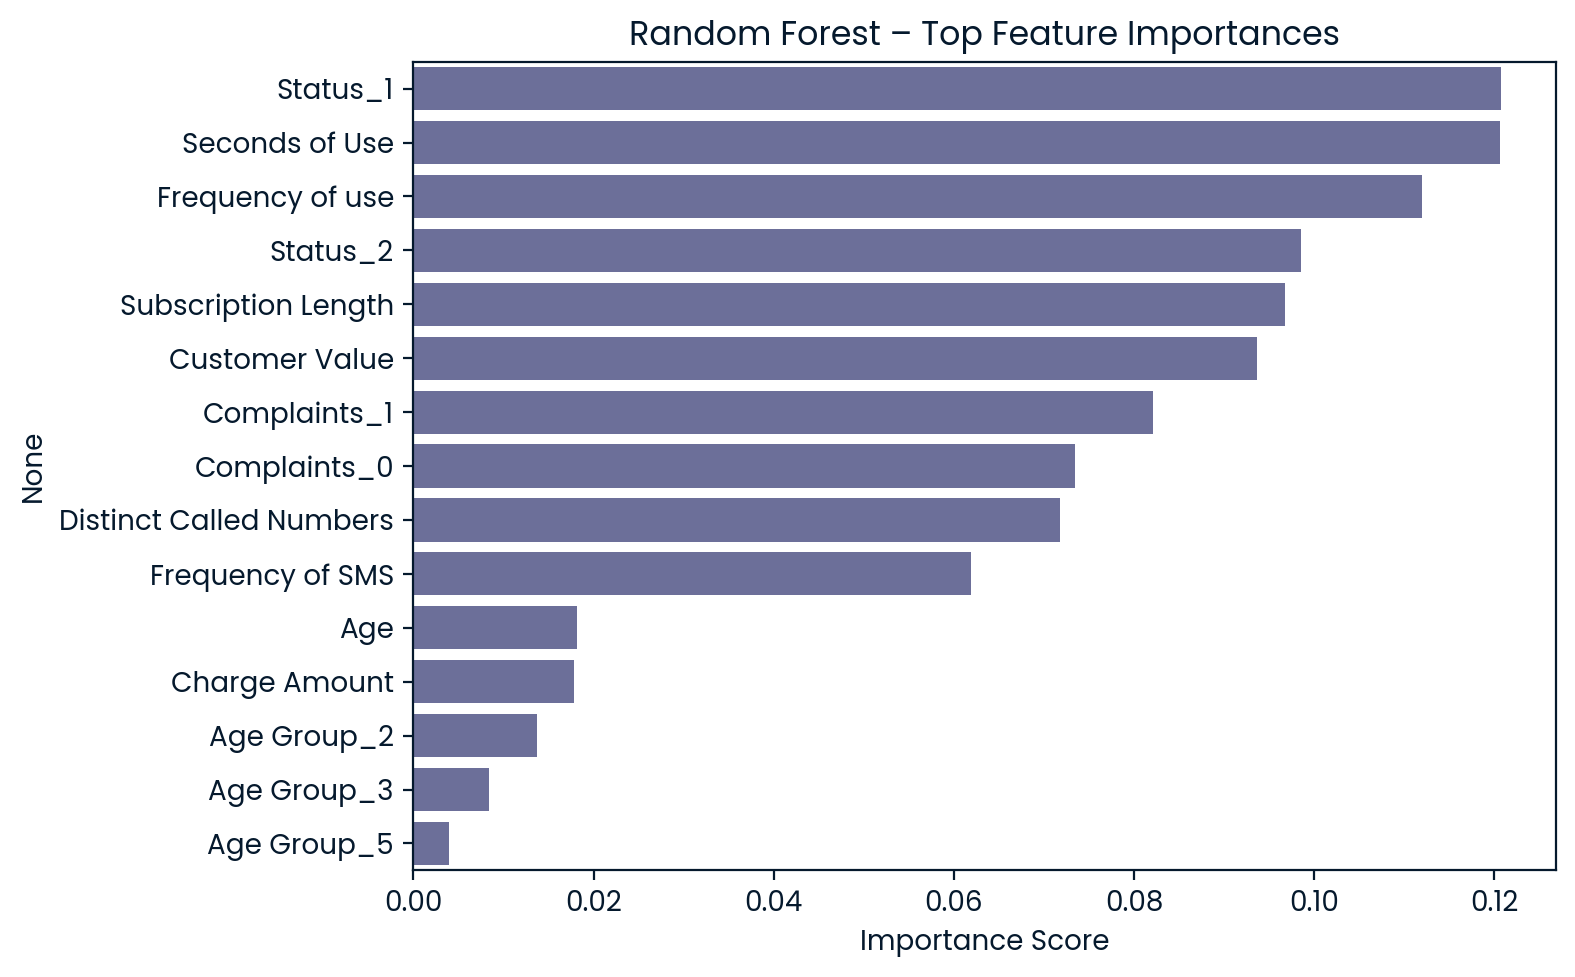

In [13]:
#  Get feature names after one‑hot encoding
ohe_cols = rf_clf.named_steps['preprocess']\
                 .named_transformers_['cat']\
                 .named_steps['encoder'].get_feature_names_out(categorical_cols)

final_feature_names = numeric_cols + list(ohe_cols)

importances = rf_clf.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=final_feature_names)\
             .sort_values(ascending=False)[:15]   #  top‑15

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, orient='h')
plt.title("Random Forest – Top Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## 🧠 Feature Importance – Understanding the Model's Decision Drivers

The Random Forest model not only performs well but also provides insight into **which features are most predictive of churn**.

### 🔝 Top Predictive Features

1. **Status_1 & Status_2**: These likely indicate service status or billing alerts — strong early churn signals.
2. **Seconds of Use & Frequency of Use**: Total usage levels reflect customer engagement. A sharp decline may indicate dissatisfaction or switching behavior.
3. **Subscription Length**: Newer customers often churn early if onboarding is poor or expectations are not met.
4. **Customer Value**: Lower-value customers may be more price-sensitive or less brand-loyal.
5. **Complaints Indicators**: Strong signals that a customer is experiencing problems.
6. **Frequency of SMS & Distinct Called Numbers**: Social engagement measures — users who communicate more tend to stay longer.

### 📈 Interpretation

These features help identify **which customer segments are at highest risk**, and **why**. For example:
- A short-tenured customer with low usage and a recent complaint is highly likely to churn.
- Conversely, a long-term user with stable usage patterns and no complaints likely represents a loyal customer.

> 🔍 These insights can directly guide **marketing strategies**, **support prioritization**, and **retention planning**.


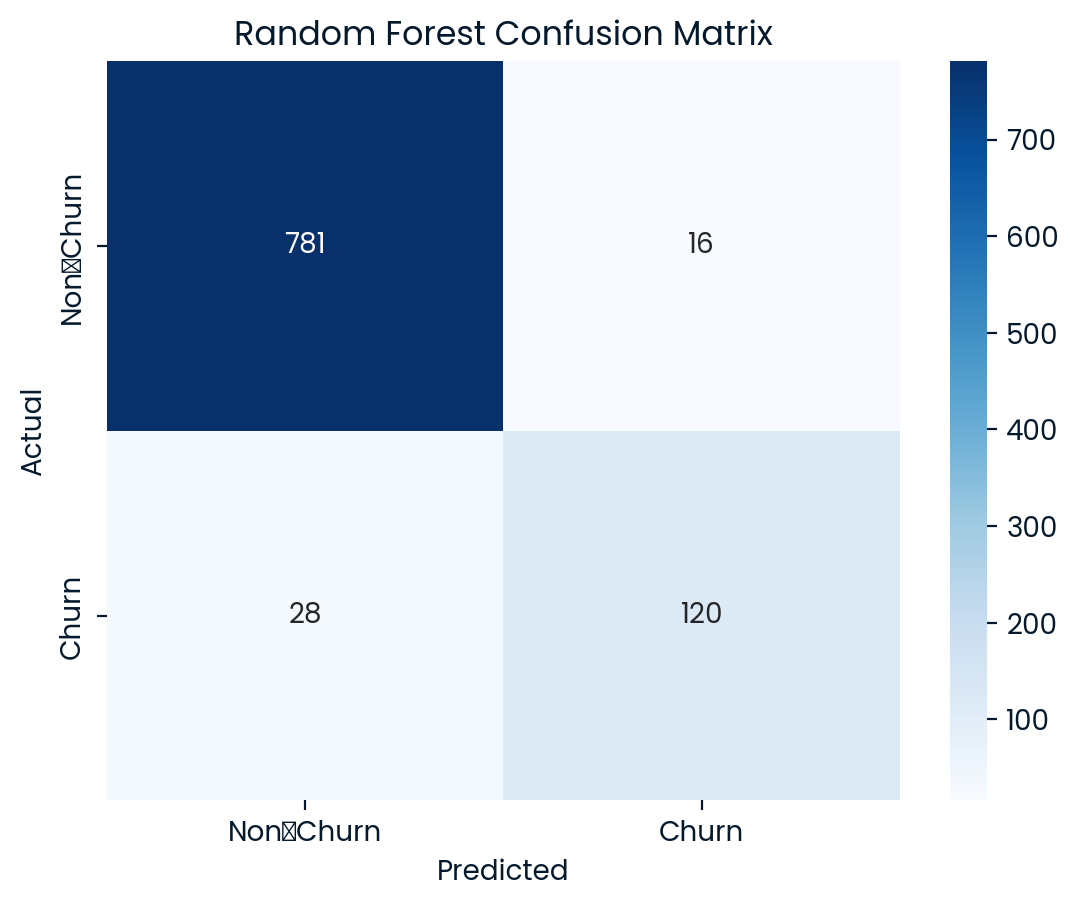

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non‑Churn","Churn"],
            yticklabels=["Non‑Churn","Churn"])
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## 🔍 Confusion Matrix – What the Model Gets Right and Wrong

The confusion matrix provides a granular view of how the Random Forest model performs:

|                       | Predicted: Non-Churn | Predicted: Churn |
|-----------------------|----------------------|------------------|
| **Actual: Non-Churn** | 781 (True Negative)  | 16 (False Positive) |
| **Actual: Churn**     | 28 (False Negative)  | 120 (True Positive) |

### 💡 Business Implications

- **True Positives (120)**: Churners correctly identified — target these customers with personalized retention offers.
- **False Positives (16)**: Loyal customers misclassified as churners — may receive unnecessary offers. However, this number is very low, showing high precision.
- **False Negatives (28)**: Missed churners — these customers may leave without warning. A small but important area for improvement.
- **True Negatives (781)**: Loyal customers correctly identified — no action needed.

> ✅ This matrix confirms that the Random Forest model is **both accurate and practical**. It minimizes unnecessary interventions while still catching the majority of actual churners.


In [15]:
print(f"""
✅  Model Summary (Random Forest):
    • Recall   : {recall_rf:.2f}
    • Precision: {precision_rf:.2f}
    • F1‑Score : {f1_rf:.2f}

The high recall ensures we capture most potential churners while balancing precision.
""")



✅  Model Summary (Random Forest):
    • Recall   : 0.81
    • Precision: 0.88
    • F1‑Score : 0.85

The high recall ensures we capture most potential churners while balancing precision.



## ✅ Conclusion and Business Insights

### 🎯 Summary of Findings

- **Random Forest** significantly outperforms Logistic Regression across most metrics, especially in **precision** and **overall accuracy**.
- Key churn predictors include **account status**, **recent usage**, **subscription age**, and **customer complaints**.
- The model’s performance makes it well-suited for **real-world deployment** to assist telecom companies in targeting at-risk customers.

### 🧭 Business Recommendations

- Focus retention campaigns on customers with **recent complaints**, **short subscription lengths**, or **declining usage**.
- Use the model output to **prioritize support escalation** for at-risk accounts.
- Re-engage new users early — since they are most likely to churn if not activated properly.

### 🚀 Next Steps for Implementation

- ✅ **Deploy** the model using a lightweight API or web app (e.g., Streamlit or Flask) integrated into CRM tools.
- ✅ **Automate** weekly churn risk scoring and update the dashboard.
- 📈 **Track KPIs**: retention lift, campaign ROI, and churn reduction post-intervention.
- 🔁 **Iterate** with new features like customer survey feedback or app usage logs to improve performance.

> 📢 **Conclusion**: This model transforms raw behavioral data into a usable, interpretable, and valuable decision-support tool that can drive tangible business impact in churn management.
